In [1]:
from btor2bqm import BTor2BQM
from instructions import Instruction

In [100]:
parser = BTor2BQM(80)
#
bqm = parser.parse_file(f"../32bit_running_examples/32_12bad_c_lin.btor2",
                  f"../temp/",
                  with_init=True, modify_memory_sort=True)

started building ../32bit_running_examples/32_12bad_c_lin.btor2 for 80 timesteps
{'size_datasegment': 2, 'size_heap': 1, 'size_stack': 9, 'begin_datasegment': 17408, 'begin_heap': 18432, 'word_size': 32, 'address_step_size': 1, 'address_word_size': 30, 'begin_stack': 1073741824}
output dir:  ../temp/
sort memory modified to be bitvector of size:  384


In [101]:
pc_flags_nids = []

file = open("../32bit_running_examples/32_12bad_c_lin.btor2", "r")

for line in file.readlines():
    elements = line.split()
    if len(elements) > 0:
        if "pc=" in elements[-1]:
            pc_flags_nids.append(int(elements[0]))
file.close()


In [102]:
qubits_to_fix = Instruction.qubits_to_fix

timesteps = [x for x in range(0,81)]
qubit_nids = []
for timestep in range(0, 81):
    temp = []
    for nid in pc_flags_nids:
        qubit_name = Instruction.created_states_ids[nid][timestep][0]
        if qubit_name in qubits_to_fix.keys():
            temp.append(nid)
    qubit_nids.append(len(pc_flags_nids) - len(temp))

In [103]:
import seaborn as sb
import pandas as pd

In [104]:
df = pd.DataFrame(list(zip(timesteps, qubit_nids)),
               columns =['timestep', 'active_flags'])

<AxesSubplot:xlabel='timestep', ylabel='active_flags'>

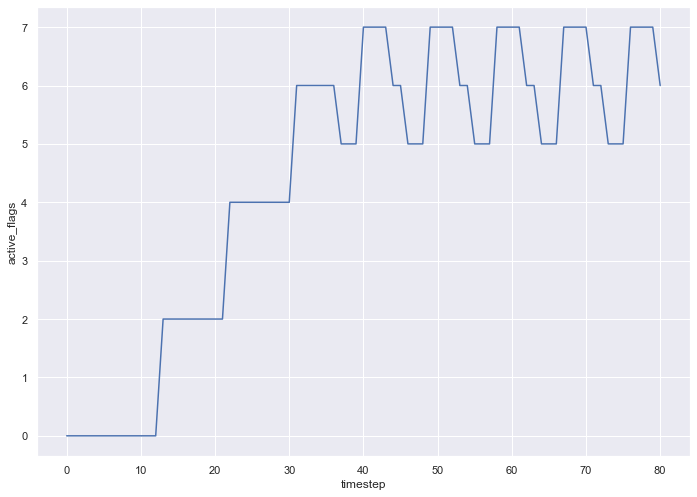

In [105]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.lineplot(data=df, x="timestep", y="active_flags")

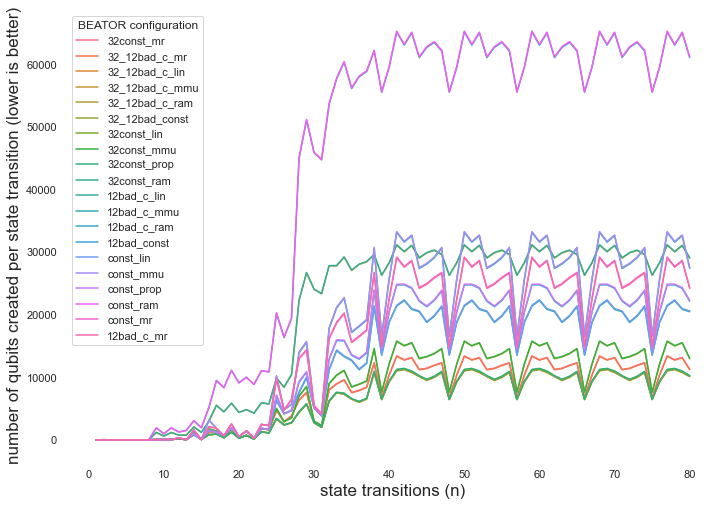

In [11]:
import matplotlib.pyplot as plt

sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
gubit_growth_df = pd.read_csv("../qubit_growth.csv")
ax = sb.lineplot(data=gubit_growth_df, x="n", y="qubits", hue="file")
ax.set_xlabel('state transitions (n)', fontsize=17)
ax.set_ylabel('number of qubits created per state transition (lower is better)',fontsize=17)
plt.legend(title='BEATOR configuration')
plt.show()

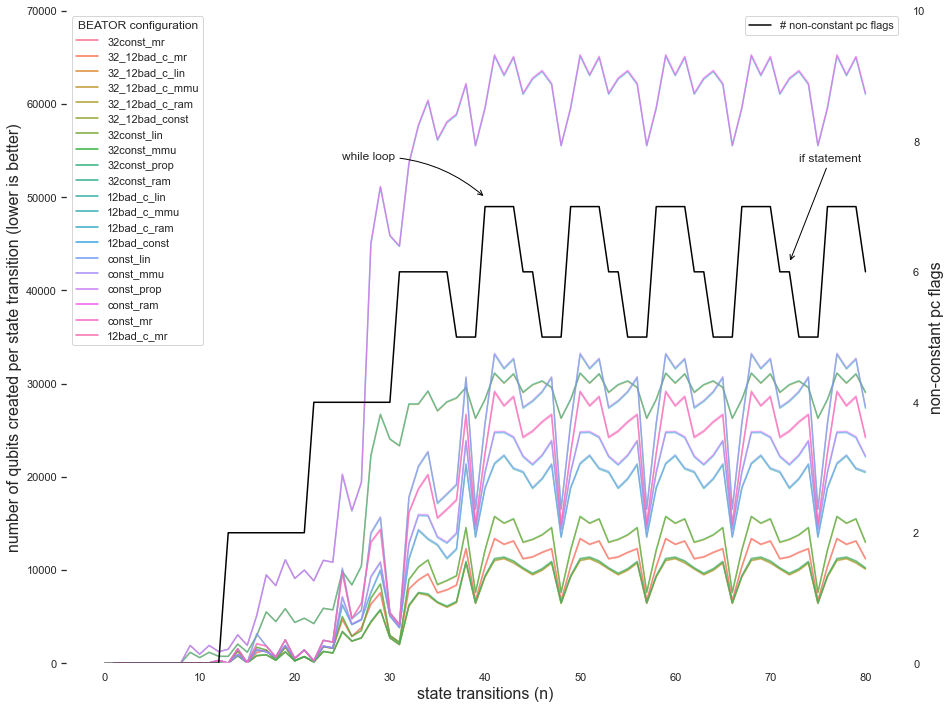

In [107]:
#Create combo chart
sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
fig, ax1 = plt.subplots(figsize=(15,12))
#bar plot creation
ax1.set_xlabel('state transitions (n)', fontsize=16)
ax1.set_ylabel('number of qubits created per state transition (lower is better)', fontsize=16)
ax1 = sb.lineplot(data=gubit_growth_df, x="n", y="qubits", hue="file",alpha  = 0.6)
ax1.legend(title='BEATOR configuration')
ax1.set(ylim=(0, 70000))
#specify we want to share the same x-axis
ax2 = ax1.twinx()

#line plot creation
ax2.set_ylabel('non-constant pc flags', fontsize=16)
ax2 = sb.lineplot(data=df, x="timestep", y="active_flags", color="black")
plt.tick_params(right = False)
ax2.legend(labels=['# non-constant pc flags'])
ax2.set(ylim=(0, 10))

ax1.grid(False)
ax2.grid(False)

ax1.annotate("while loop", xy=(40, 50000),
            xytext=(25, 54000),xycoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2", color="black"))

ax1.annotate("if statement", xy=(72, 43000),
            xytext=(73, 53800),xycoords='data',
            arrowprops=dict(arrowstyle="->", color="black"))
#show plot
plt.show()

started building ../btor2files/s0.btor2 for 80 timesteps
{'size_datasegment': 2, 'size_heap': 1, 'size_stack': 9, 'begin_datasegment': 8704, 'begin_heap': 9216, 'word_size': 64, 'address_step_size': 1, 'address_word_size': 29, 'begin_stack': 536870912}
output dir:  ../temp/
sort memory modified to be bitvector of size:  768


<AxesSubplot:xlabel='timestep', ylabel='active_flags'>

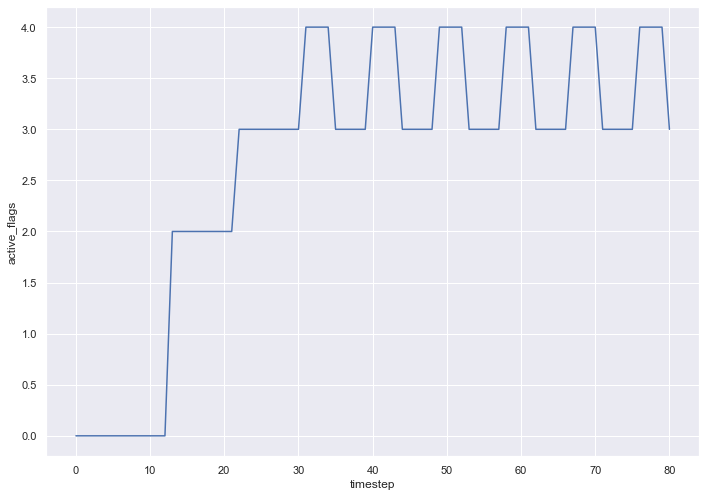

In [95]:
parser = BTor2BQM(80)
#
bqm = parser.parse_file(f"../btor2files/s0.btor2",
                  f"../temp/",
                  with_init=True, modify_memory_sort=True)

pc_flags_nids = []

file = open("../btor2files/s0.btor2", "r")

for line in file.readlines():
    elements = line.split()
    if len(elements) > 0:
        if "pc=" in elements[-1]:
            pc_flags_nids.append(int(elements[0]))
file.close()
qubits_to_fix = Instruction.qubits_to_fix

timesteps = [x for x in range(0,81)]
qubit_nids = []
for timestep in range(0, 81):
    temp = []
    for nid in pc_flags_nids:
        qubit_name = Instruction.created_states_ids[nid][timestep][0]
        if qubit_name in qubits_to_fix.keys():
            temp.append(nid)
    qubit_nids.append(len(pc_flags_nids) - len(temp))
    
df = pd.DataFrame(list(zip(timesteps, qubit_nids)),
               columns =['timestep', 'active_flags'])

sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.lineplot(data=df, x="timestep", y="active_flags")

started building ../btor2_running_example/12bad_c_lin.btor2 for 80 timesteps
{'size_datasegment': 2, 'size_heap': 1, 'size_stack': 9, 'begin_datasegment': 8704, 'begin_heap': 9216, 'word_size': 64, 'address_step_size': 1, 'address_word_size': 29, 'begin_stack': 536870912}
output dir:  ../temp/
sort memory modified to be bitvector of size:  768


<AxesSubplot:xlabel='timestep', ylabel='active_flags'>

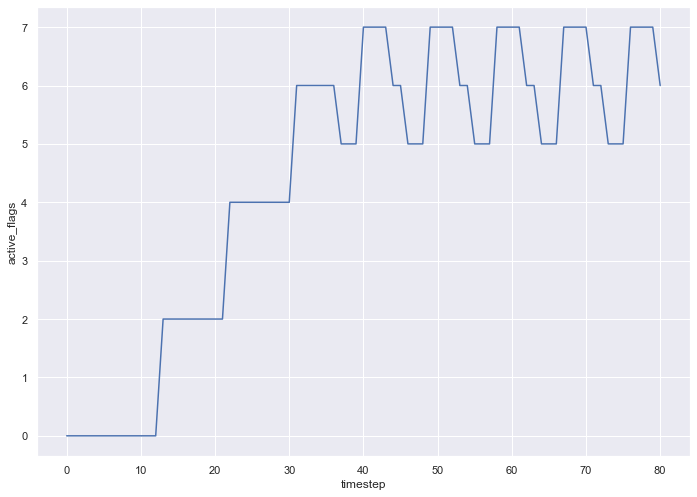

In [99]:
parser = BTor2BQM(80)
#
bqm = parser.parse_file(f"../btor2_running_example/12bad_c_lin.btor2",
                  f"../temp/",
                  with_init=True, modify_memory_sort=True)

pc_flags_nids = []

file = open("../btor2_running_example/12bad_c_lin.btor2", "r")

for line in file.readlines():
    elements = line.split()
    if len(elements) > 0:
        if "pc=" in elements[-1]:
            pc_flags_nids.append(int(elements[0]))
file.close()
qubits_to_fix = Instruction.qubits_to_fix

timesteps = [x for x in range(0,81)]
qubit_nids = []
for timestep in range(0, 81):
    temp = []
    for nid in pc_flags_nids:
        qubit_name = Instruction.created_states_ids[nid][timestep][0]
        if qubit_name in qubits_to_fix.keys():
            temp.append(nid)
    qubit_nids.append(len(pc_flags_nids) - len(temp))
    
df = pd.DataFrame(list(zip(timesteps, qubit_nids)),
               columns =['timestep', 'active_flags'])

sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.lineplot(data=df, x="timestep", y="active_flags")